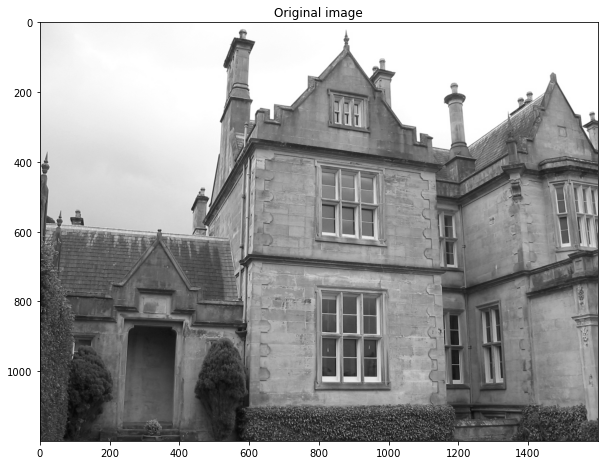

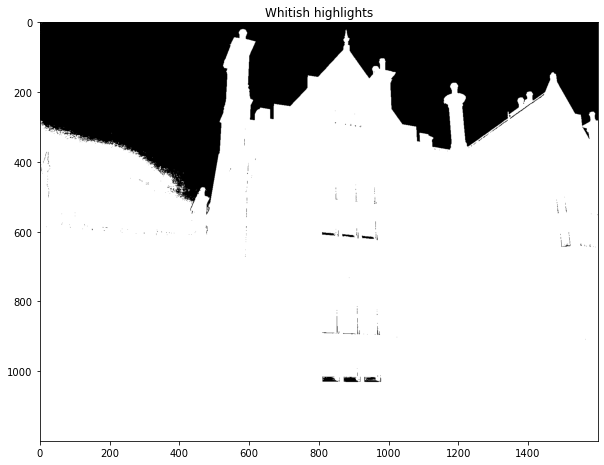

Size of Image: 5760000
Maximum RGB value: 255
Minimum RGB value: 0


In [120]:
#Answer to question: Edge highlights is an effect that accentuates boundaries and edges in images. 
#Unlike sharpening, which increases the contrast around 
#edges, the goal here is to add highlights with certain color at the 
#edges. This can be achieved by adding a scaled version of the 
#magnitude of image gradient to the image. In a sense this is an 
#alpha blending between the image and it’s gradient magnitude.

#-Implement an ImageJ plugin that takes a gray-level image and 
#produce bright “whitish” highlights on the edges. You need to make 
#sure that the range of any pixel does not exceed 255. Test the code on the image ireland-03gray.tif 

import numpy as np
import cv2
from matplotlib import pyplot as plt

irelandimg = cv2.imread('D:/CS334/ireland-03gray.tif', 1)
plt.figure(figsize = (10, 10))
plt.imshow(irelandimg)
plt.title("Original image")
#Plot Original image
plt.show()

# convert to grayscale
gray = cv2.cvtColor(irelandimg, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize = (10, 10))
plt.imshow(binary, cmap="gray")
plt.title("Whitish highlights")
plt.show()

print('Size of Image: {}'.format(irelandimg.size))
print('Maximum RGB value: {}'.format(irelandimg.max()))
print('Minimum RGB value: {}'.format(irelandimg.min()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[54.33333333 56.33333333 55.33333333 ... 84.33333333 84.33333333
  84.33333333]
 [55.33333333 56.33333333 55.33333333 ... 84.33333333 84.33333333
  84.33333333]
 [55.33333333 55.33333333 56.33333333 ... 84.33333333 84.33333333
  84.33333333]
 ...
 [70.         67.         64.         ... 40.         35.
  34.        ]
 [60.         75.          2.66666667 ... 39.         38.
  36.        ]
 [59.         68.         81.         ... 39.         46.
  38.        ]]


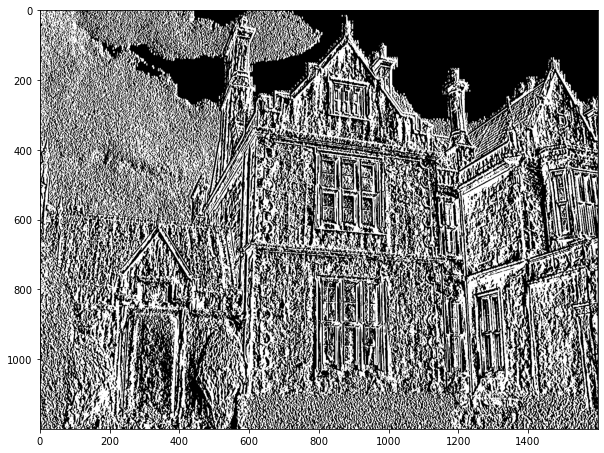

In [121]:
#-Modify the plugin such that it takes an input colored image and produce the highlights on the edges. You need first to obtain a gray-scale image by averaging the three color channels, and then 
#perform the gradient operation on that image. The scaled magnitude of the image gradient is then added to each of the color channels. Test the code on the provided image. Test the code on the image Amsterdam.JPG
 
image = cv2.imread('D:/CS334/ireland-03gray.tif', 0)
sobelx = cv2.Sobel(fiximgage,cv2.CV_64F,1,0,ksize=5)

fiximgage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#extract channels
R, G, B = fiximgage[:,:,0], fiximgage[:,:,1],fiximgage[:,:,2]

#formula
channel = (R+B+G) / 3
print(channel)

plt.figure(figsize = (10, 10))
plt.imshow(channel, cmap='gray')
plt.imshow(sobelx)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[37.66666667 37.         37.66666667 ... 54.66666667 32.66666667
  37.66666667]
 [37.         37.         37.         ... 57.66666667 49.
  46.66666667]
 [36.         37.         37.         ... 27.33333333 27.33333333
  32.66666667]
 ...
 [59.66666667 53.66666667 48.66666667 ... 16.         17.
  18.        ]
 [47.66666667 43.66666667 41.66666667 ... 23.66666667 29.66666667
  34.66666667]
 [42.         37.         37.         ... 38.         43.
  47.        ]]


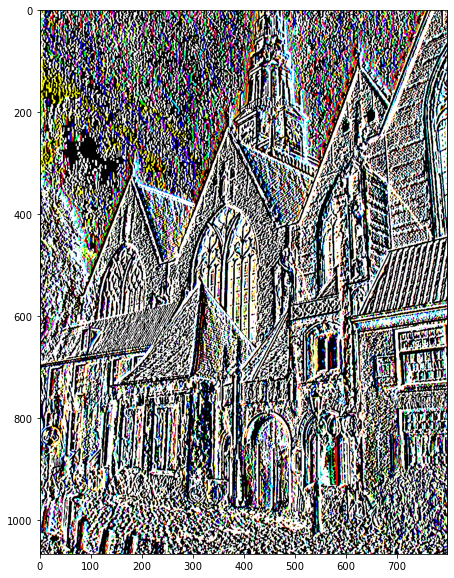

In [123]:
#Test the code on the image Amsterdam.JPG 
image = cv2.imread('D:/CS334/Amsterdam.JPG')
sobelx = cv2.Sobel(fiximgage,cv2.CV_64F,1,0,ksize=5)

fiximgage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#extract channels
R, G, B = fiximgage[:,:,0], fiximgage[:,:,1],fiximgage[:,:,2]

#formula
channel = (R+B+G) / 3
print(channel)

plt.figure(figsize = (10, 10))
plt.imshow(channel, cmap='gray')
plt.imshow(sobelx)
plt.show()


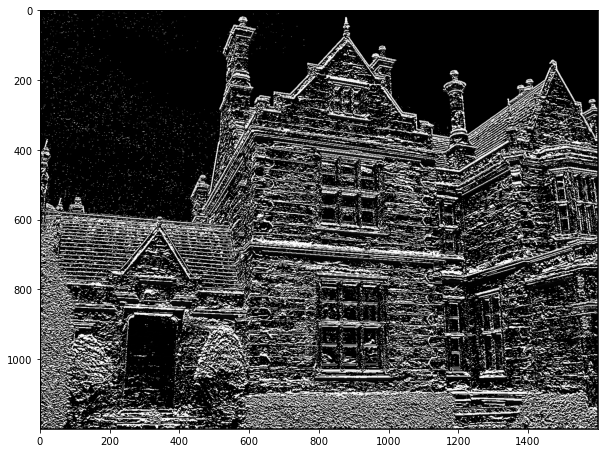

In [183]:
#Modify the plugin such that it produces dark highlights on the edges

#Vertical & Horizontal Sobel Filters
vertical = [[-1, -2, -1], [0,0,0], [1,2,1]]
horizotal = [[-1,0,1], [-2,0,2], [-1,0,1]]
n,m,d = irelandimg.shape

#Apply Vertical Filter
verticaleimgery = np.zeros_like(irelandimg) 

for row in range(3, n-2):
    for col in range(3, m-2):
        pixelate = irelandimg[row-1:row+2, col-1:col+2, 0]
        PixelTransformation = vertical*pixelate
        #normalize value
        score = (PixelTransformation.sum() + 4)/8
        verticaleimgery[row, col] = [score]*3
       
plt.figure(figsize = (10, 10))
plt.imshow(verticaleimgery)

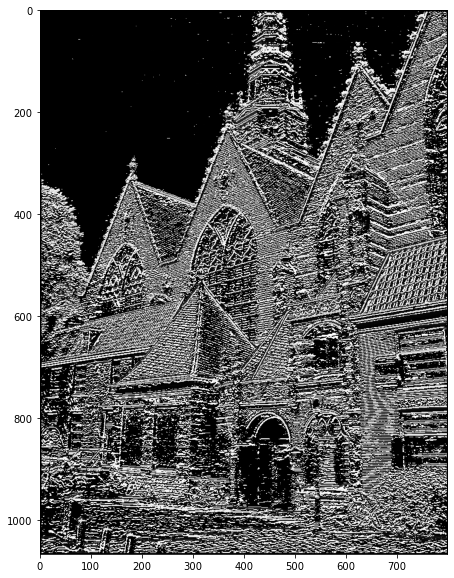

In [186]:
#Test the code on the image Amsterdam.JPG

vertical = [[-1, -2, -1], [0,0,0], [1,2,1]]
horizotal = [[-1,0,1], [-2,0,2], [-1,0,1]]
n,m,d = image.shape

verticaleimgery = np.zeros_like(image) 

for row in range(3, n-2):
    for col in range(3, m-2):
        pixelate = image[row-1:row+2, col-1:col+2, 0]
        PixelTransformation = vertical*pixelate
        score = (PixelTransformation.sum() + 4)/8
        verticaleimgery[row, col] = [score]*3
        
plt.figure(figsize = (10, 10))   
plt.imshow(verticaleimgery)

Text(0.5, 1.0, 'absolute difference of image')

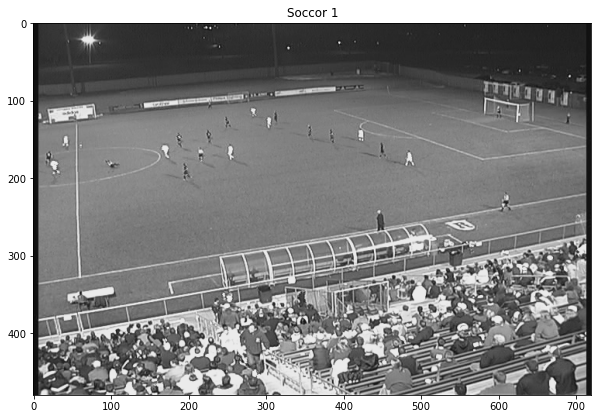

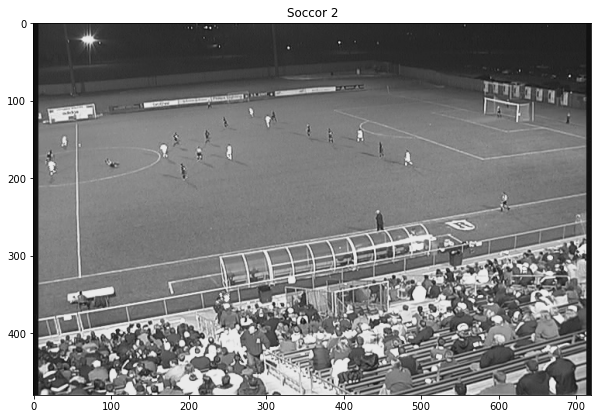

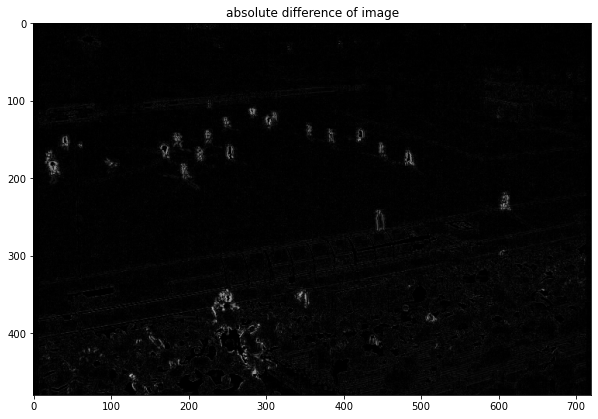

In [158]:
#[Q II-2 – 40pts] Given two images I1, I2, use ImageJ point operation to obtain the absolute difference image d=abs(I1-I2)
# Code is implemented in Python
import cv2 as cv


l1 = cv2.imread('D:/CS334/soccer1.bmp')
plt.figure(figsize = (10, 10))
plt.imshow(l1)
plt.title("Soccor 1")

l2 = cv2.imread('D:/CS334/soccer2.bmp')
plt.figure(figsize = (10, 10))
plt.imshow(l2)
plt.title("Soccor 2")


#calculating absolute differences
imaged = cv.absdiff(l1, l2)

plt.figure(figsize = (10, 10))


#display image computed of the image
plt.imshow(imaged)
plt.title("absolute difference of image")



(array([1.010376e+06, 1.749300e+04, 3.630000e+03, 2.016000e+03,
        1.287000e+03, 1.023000e+03, 6.330000e+02, 2.610000e+02,
        7.500000e+01, 6.000000e+00]),
 array([  0.,  21.,  42.,  63.,  84., 105., 126., 147., 168., 189., 210.]),
 <BarContainer object of 10 artists>)

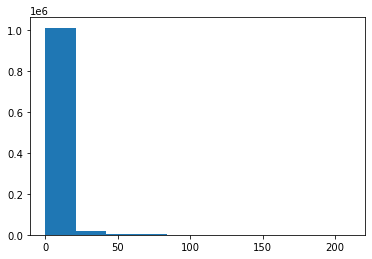

In [169]:
#2- Plot the histogram for the absolute difference image d
plt.hist(imaged.ravel())

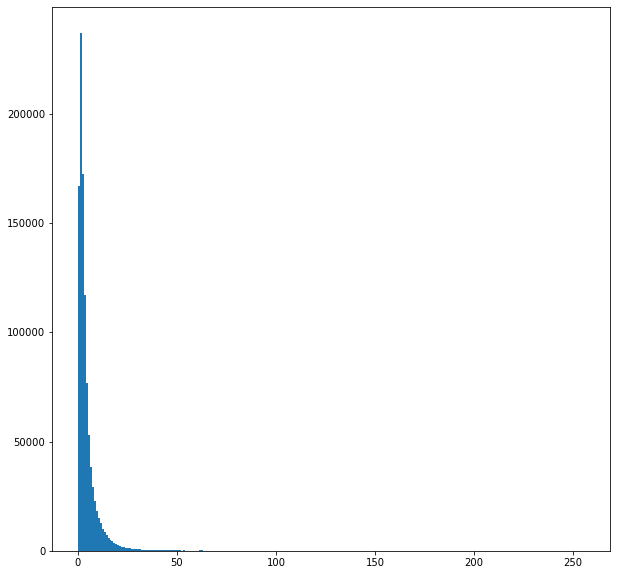

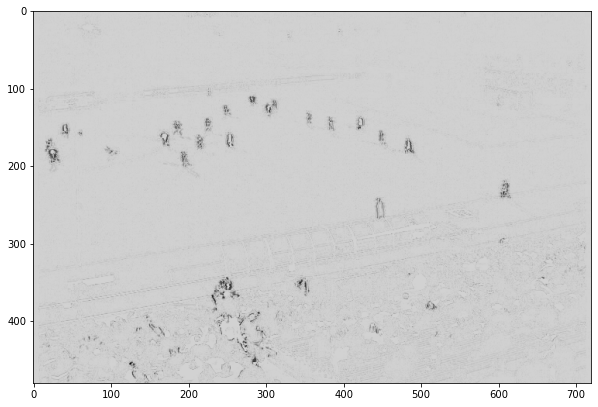

In [176]:
#Visualize the absolute difference imaged. To get a good visualization, you need to stretch the range of values in d to 
#be from 0-255. Use a point operation to achieve this stretching. Show the result
plt.figure(figsize = (10, 10))

plt.hist(imaged.ravel(), 256, [0, 256])

#Maximum intensity Level
Intense = imaged.max()

#Calulate each intensity level
TotalIntensity = Intense - imaged
plt.figure(figsize = (10, 10))

plt.imshow(imaged)
plt.imshow(TotalIntensity)

Text(0.5, 1.0, 'Blur')

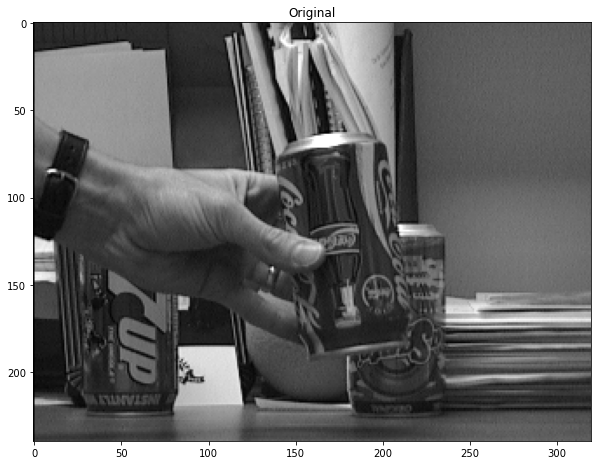

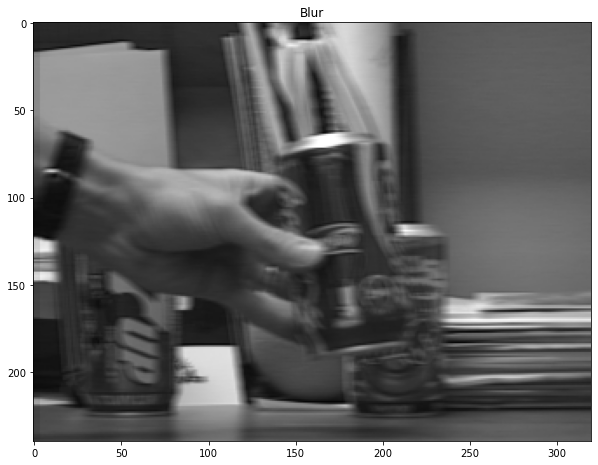

In [177]:
#[Q II-4 – 15pts] Design a linear filter that creates a horizontal blur over a length of 7 pixels, thus simulating the effect of camera 
#movement during exposure. Implement this horizontal blur filter and test your code on the image 100.tif as well as your selfi image from the previous assignment


filteredimage = cv2.imread('D:/CS334/100.tif', 1)

size = 7

kernel = np.zeros((size, size))
kernel[int((size - 1) / 2), :] = np.ones(size)

kernel /= size

horizonal = cv2.filter2D(filteredimage, -1, kernel)

plt.figure(figsize = (10, 10))

plt.imshow(filteredimage)
plt.title("Original")


plt.figure(figsize = (10, 10))


plt.imshow(horizonal)
plt.title("Blur")


Text(0.5, 1.0, 'Blur')

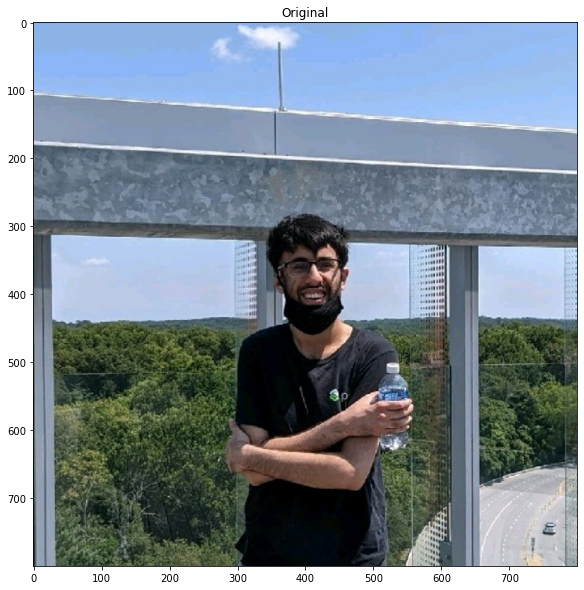

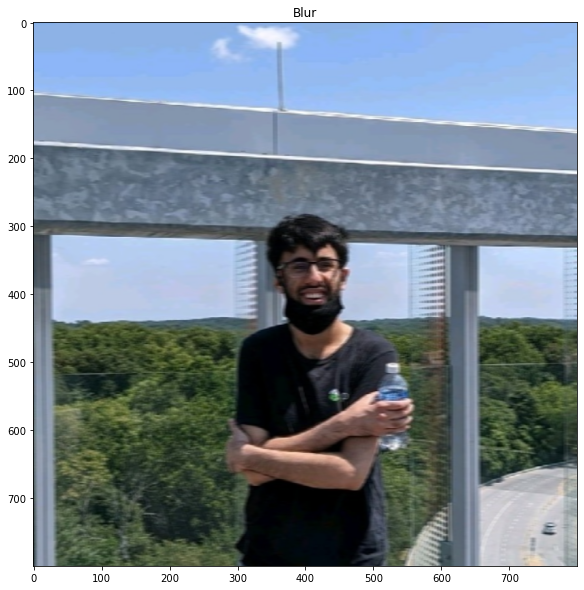

In [178]:
#selfie
#testing on selfie

selfie = cv2.imread('C:/Users/sanji/Desktop/sanjit.jpg', 1)

fiximgage = cv2.cvtColor(selfie, cv2.COLOR_RGB2BGR)

size = 7

kernel = np.zeros((size, size))
kernel[int((size - 1) / 2), :] = np.ones(size)

kernel /= size

horizonal = cv2.filter2D(fiximgage, -1, kernel)

plt.figure(figsize = (10, 10))

plt.imshow(fiximgage)
plt.title("Original")


plt.figure(figsize = (10, 10))


plt.imshow(horizonal)
plt.title("Blur")
